# Classification Workshops

Welcome! This workshop is from [WinderResearch.com](https://WinderResearch.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual).

I wrote these workshops because I want to show you _how_ classifiers work. I could have just created an `sklearn` tutorial, but I find that this approach doesn't provide the intuition.

By the end of these workshops you should be able to understand why simple classifiers are powerful enough to be used in most problems. And I also want you to be comfortable with using the `sklearn` library.

# Notebook Exercise 1: Decision Trees

Welcome! This workshop is from [WinderResearch.com](https://WinderResearch.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual).

Remember the goal of data science. The goal is to make a decision based upon some data. The quality of that decision depends on our information. If we have good, clear information then we can make well informed decisions. If we have bad, messy data then our decisions will be poor.

## Classification

In the context of classification, which is the the attempt to predict which _class_ an observation belongs to, we can be more certain about a result if our algorithm is able to separate the classes _cleanly_.

One measure of how _clean_ or _pure_ a collection of classes are is Entropy.

In this workshop we will mathematically define entropy, which is a measure of the amount of information that can be stored in a limited number of bits.

In [0]:
import numpy as np # Numpy is a general purpose mathematical library for Python. 
                   # Most higher level data science libraries use Numpy under the bonnet.

In [2]:
X = np.array([0, 0, 1, 1, -1, -1, 100]) # Create an array. All numpy funcitons expect the data in a Numpy array.
print(np.mean(X))
print(np.var(X))

14.285714285714286
1225.061224489796


## Entropy

Remember entrpopy is defined as:

$$H=-\sum(p_i \log_2 (p_i))$$

Where \\(p_i\\) is the probability that the observation belongs to class \\(i\\). (i.e. $p(y==c)/n$, where y is the target, c is the class of interest and n is the total number of samples)

For example, if we have two classes:

$$H=-p_1 \log_2 (p_1)-p_2 \log_2 (p_2)$$


### Task

- Read through this code and understand what is going on.
- Try calculating the entropy of another array of values. What happens when you add more values? Change values?

In [0]:
y = np.array([0, 0, 1, 1])                                  # They implement all kinds of useful operators, like the == operator.

In [0]:
def entropy(y):
    probs = []            # A placeholder for probabilities of each class label
    classes = set(y)      # List of classes. A mathematical set. E.g. set([0,0,1,1]) == [0,1]
    num_states = len(y)   # Total possible number of states
    for c in classes:     # For each class
        same_class = y == c               # Which observations have the same class?
        num_same_class = sum(same_class)  # Implicit conversion here. sum([true, true, false, false]) == 2
        p = num_same_class / num_states   # Probability of this class label (interested states / all possible states)
        probs.append(p)
    # Now we have the probabilities for all the classes, calculate the entropy
    return np.sum(-p * np.log2(p) for p in probs)

In [5]:
print(entropy(y)) # Should be 1.0

1.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


## Information gain

Imagine we had some data like that of `X` and `y` above, where `X` are the fetures and `y` are the class labels.

We could propose a threshold or a rule that would split the data in `X` to separate the classes. How would we quantify which was the best split?

What we can do is compare the entropy of the parent before the split against the weighted combination of the entropy after the split. I.e. if three observations end up in the left bucket and one in the right, then the left bucket will account for three quarters of the child's entropy.

If we subtract the parent entropy from the weighted child's entroy, we're left with a measure of _improvement_. This is called the _information gain_.

The information gain is defined as the parent entropy minus the weighted entropy of the subgroups.

$$
\begin{align}
IG(parent, children) = & entropy(parent) - \nonumber \\\\
& \left(p(c_1)entropy(c_1) + p(c_2)entropy(c_2) + ...\right)
\end{align}
$$

### Tasks:

- Given the following `information_gain` function (understand it) pick some splits and calculate the information gain. Which is better?

In [0]:
X = np.array([[4.2, 92], [6.4, 102], [3.5, 3], [4.7, 10]])
y = np.array([0, 0, 1, 1])

In [0]:
def information_gain(parent, left_split, right_split):
    return entropy(parent) - (len(left_split) / len(parent)) * entropy(left_split) - (len(right_split) / len(parent)) * entropy(right_split)

In [8]:
# Make a split around the first column, < 5.0:
split1 = information_gain(y, y[X[:, 0] < 5.0], y[X[:, 0] > 5.0])
print("%0.2f" % split1)   # Should be 0.31

0.31


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


In [9]:
# Make a split around the second column, < 50.0:
split2 = information_gain(y, y[X[:, 1] < 50], y[X[:, 1] > 50])
print(split2)   # Should be 1.0
print("Split %d is better" % ((split1 < split2) + 1))     # Split 2 should be better, higher information gain

1.0
Split 2 is better


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  # This is added back by InteractiveShellApp.init_path()


## Feature selection by information gain

One simple way to evaluate the importance of features (something we will deal with later) is to calculate the entropy for prospective splits.

In this example, we will look at a real dataset called the ["mushroom dataset"](https://archive.ics.uci.edu/ml/datasets/mushroom). It is a large collection of data about poisonous and edible mushrooms.

Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s

In [10]:
# Load the data with a library called pandas. Pandas is very cool, and we will be using it a lot.
import pandas as pd
import numpy as np

# We're going to use the display module to embed some outputs
from IPython.display import display

# Read data using Pandas from the UCI data repository.
feature_names = ["poisonous", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
X = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=0, names=feature_names)
y = X["poisonous"]                      # Select target label
X.drop(['poisonous'], axis=1, inplace=True)   # Remove target label from dataset
display(X.head())                       # Show some data

y = y.map({"e": 0, "p": 1})             # Mapping the classes to zeros and ones, not strictly necessary.
display(y.head())

,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


0    0
1    0
2    1
3    0
4    0
Name: poisonous, dtype: int64

In [11]:
# This is the entropy method we defined in the Entropy workshop
def entropy(y):
    probs = [] # Probabilities of each class label
    for c in set(y): # Set gets a unique set of values. We're iterating over each value
        num_same_class = sum(y == c)  # Remember that true == 1, so we can sum.
        p = num_same_class / len(y) # Probability of this class label
        probs.append(p)
    return np.sum(-p * np.log2(p) for p in probs)

# What is the entropy of the entire set?
print("Entire set entropy = %.2f" % entropy(y))

Entire set entropy = 1.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys


In [0]:
# Let's write some functions that calculates the entropy after splitting on a particular value

def class_probability(feature, y):
    """Calculates the proportional length of each value in the set of instances"""
    # This is doc string, used for documentation
    probs = []
    for value in set(feature):
        select = feature == value # Split by feature value into two classes
        y_new = y[select]         # Those that exist in this class are now in y_new
        probs.append(float(len(y_new))/len(X))  # Convert to float, because ints don't divide well
    return probs

def class_entropy(feature, y):
    """Calculates the entropy for each value in the set of instances"""
    ents = []
    for value in set(feature):
        select = feature == value # Split by feature value into two classes
        y_new = y[select]         # Those that exist in this class are now in y_new
        ents.append(entropy(y_new))
    return ents

def proportionate_class_entropy(feature, y):
    """Calculatates the weighted proportional entropy for a feature when splitting on all values"""
    probs = class_probability(feature, y)
    ents = class_entropy(feature, y)
    return np.sum(np.multiply(probs, ents)) # Information gain equation


In [13]:
# Let's try calculating the entropy after splitting by all the values in "cap-shape"
new_entropy = proportionate_class_entropy(X["cap-shape"], y)
print("Information gain of %.2f" % (entropy(y) - new_entropy))
# Should be an information gain of 0.05

Information gain of 0.05


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys


In [14]:
# Now let's try doing the same when splitting based upon all values of "odor"
new_entropy = proportionate_class_entropy(X["odor"], y)
print("Information gain of %.2f" % (entropy(y) - new_entropy))
# Should be an information gain of 0.91

Information gain of 0.91


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys


Clearly, if we were thinking about looking at individual features, then `odor` would be a far better prospect than `cap-shape`.

This is cool. You have manually implemented a Decision Tree! Well done! Later on we'll use a library to do this sort of thing.

### Which Feature Produces the Best Split?

We can repeat this process for all features. The best split is the one with the highest information gain.

In [15]:
for c in X.columns:
    new_entropy = proportionate_class_entropy(X[c], y)
    print("%s %.2f" % (c, entropy(y) - new_entropy))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys


cap-shape 0.05
cap-surface 0.03
cap-color 0.04
bruises? 0.19
odor 0.91
gill-attachment 0.01
gill-spacing 0.10
gill-size 0.23
gill-color 0.42
stalk-shape 0.01
stalk-root 0.13
stalk-surface-above-ring 0.28
stalk-surface-below-ring 0.27
stalk-color-above-ring 0.25
stalk-color-below-ring 0.24
veil-type 0.00
veil-color 0.02
ring-number 0.04
ring-type 0.32
spore-print-color 0.48
population 0.20
habitat 0.16


## Plotting

Throughout data science, results are more intruitive to reason about if you present the data or the results in different media.

Plotting is used for everything; investigating data through to presenting results.

You should become familiar with plotting data; below we go through a fairly comprehensive example.

In [0]:
# Matplotlib is _the_ plotting library for python. Most other tools are based 
# upon matplot lib. We will use others as appropriate in the future (mainly
# pandas's helpers)
import matplotlib.pyplot as plt

colours = 'bgrcmk'  # An array of colours used during plotting later on.

def plot_entropy(probability, entropy, labels):
    """Graphical representation of entropy when splitting on each value"""

    # Some complex calculations to get the centre of the bars
    positions = np.array([0])
    positions = np.concatenate((positions, np.cumsum(probability)[:-1]))
    positions += np.divide(probability, 2)
    
    # Plot bars with colours
    plt.bar(positions, entropy, width=probability, color=colours[:len(probability)])

    # Set limits
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    
    # Labels
    plt.ylabel("Entropy")
    plt.xlabel("Probability")
    
    # If labels are provided, plot some text
    if labels:
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        for i, lab in enumerate(labels):
            # Plot text
            plt.text(positions[i], 0.1, lab, fontsize=14, verticalalignment='top', bbox=props)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys


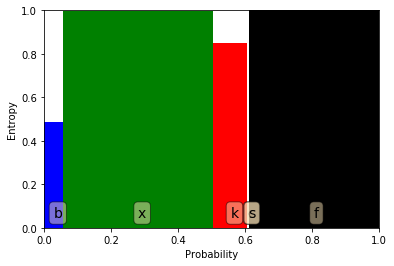

In [17]:
# Plot for "cap-shape" feature
feature = X["cap-shape"]
# Calculate probabilities and entropies
probs = class_probability(feature, y)
ents = class_entropy(feature, y)
labels = set(feature)
plot_entropy(probs, ents, labels)
plt.show() # You must run `plt.show()` at the end to show your plot.

We are plotting the entropy on the y-axis and the proportion of the dataset included when performing that split on the x-axis.

This plot works well for categorical features.

The total entropy of this split is the area that is covered by all of the bars.

We can see that there isn't much whitespace; i.e. not much information gain.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  import sys


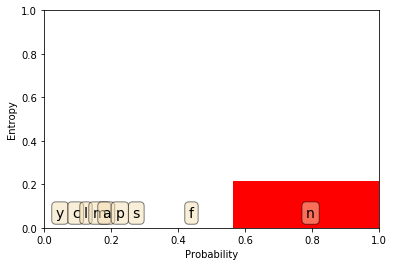

In [18]:
# Plot for "odor" feature
feature = X["odor"]
probs = class_probability(feature, y)
ents = class_entropy(feature, y)
labels = set(feature)
plot_entropy(probs, ents, labels)
plt.show()

This time there is lots of whitespace. The total area is very small.

The propotionate entropy is visibly smaller.

## Tasks

- Which is the better feature to use, `gill-size` or `veil-color`?

## Categorical Decision Trees in SKLearn

Surprisingly, there are still no categorical decision tree implementations in sklearn. You can read more about one proposal [here](https://github.com/scikit-learn/scikit-learn/pull/4899).

So instead, if you wanted to use sklearn, you would have to one-hot encode the categories.

# Notebook Exercise 2: Linear and Logistic Classification

Welcome! This workshop is from [WinderResearch.com](https://WinderResearch.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual).

In this sectino we look at defining a loss function that mimises the classification error. For now let us look at the classifiers and in the next workshop we will look at how to optimise the loss function.

In [0]:
# Usual imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn import datasets
from sklearn import preprocessing

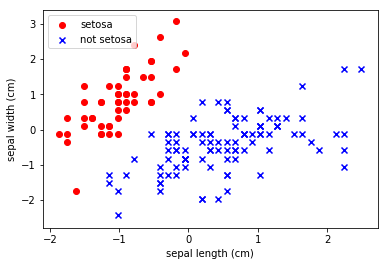

In [20]:
# import some data to play with
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
y[y != 0] = 1 # Only use two targets for now
colors = "bry"

# standardize
X = preprocessing.StandardScaler().fit_transform(X)

# plot data
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[y != 0, 0], X[y != 0, 1],
            color='blue', marker='x', label='not setosa')

plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend(loc='upper left')
plt.show()

We can visually see that there is a clear demarcation between the classes.

We theorise that we should be able to make a robust classifier with a simple linear model.

Let's do that with the classsification version of the stochastic gradient descent algorithm
from `sklearn.linear_model.SGDClassifier`...

In [0]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="squared_loss", learning_rate="constant", eta0=0.01, max_iter=10, penalty=None).fit(X, y)

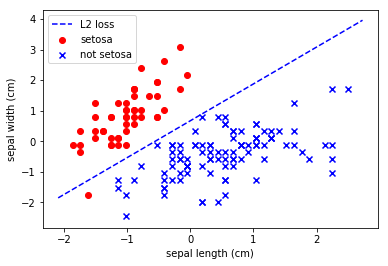

In [22]:
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[y != 0, 0], X[y != 0, 1],
            color='blue', marker='x', label='not setosa')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color, label):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color, label=label)


plot_hyperplane(0, 'b', "L2 loss")

plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend(loc='upper left')
plt.show()

Not too bad.

### Tasks

- Try altering the values of eta and the number of iterations

We don't use any regularization here, because we only have two features. This would be far more
important when we had multiple features.

## Logistic Regression

I find the name logistic regression annoying. We don't normally use logistic regression for anything other than classification; but statistics coined the name long ago.

Despite the name, logistic regression is incredibly useful. Instead of optimising the error of the distance like we did in standard [linear regression](https://trainingdatascience.com/workshops/linear-classification/), we can frame the problem probabilistically. Logistic regression attempts to separate classes based upon the probability that an observation belongs to a class.

In [0]:
# Usual imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn import datasets
from sklearn import preprocessing

In [0]:
# import some data to play with
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
y[y != 0] = 1 # Only use two targets for now
colors = "bry"

# standardize
X = preprocessing.StandardScaler().fit_transform(X)

Of course, SKLearn has an implementation of logistic regression and it uses the usual `fit` API.

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Because I want to show probability contours, the plotting code is a bit more complicated than usual.

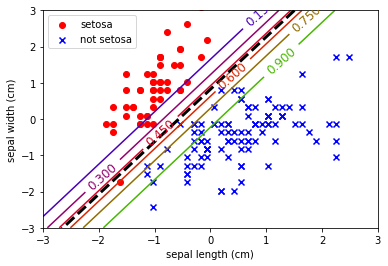

In [26]:
# Create a grid of points then calculate the probability at each point. This creates a "mesh" of points.
x0, x1 = np.meshgrid(
        np.linspace(-3, 3, 500).reshape(-1, 1),
        np.linspace(-3, 3, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[y != 0, 0], X[y != 0, 1],
            color='blue', marker='x', label='not setosa')

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([-3, 3])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend(loc='upper left')
plt.axis([-3,3,-3,3])
plt.show()

Note the probability estimates in the contours. This is an incredibly useful trait. To provide class estimates with an estimate to show how likely that observation is to really be part of that class.

But always remember that these estimates are based upon a gaussian fit of the data. If the data isn't representative or it isn't normally distributed, then these estimates will be erroneous in some way.

## Tasks

- Try predicting the probability manually for a few points on either side of the line. (See above, the line that uses `log_reg.predict_proba`)

# Notebook Exercise 3: Introduction to Gradient Descent

Welcome! This workshop is from [WinderResearch.com](https://WinderResearch.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual).

For only a few algorithms an analytical solution exists. For example, we can use the _Normal Equation_ to solve a linear regression problem directly.

However, for most algorithms we rely cannot solve the problem analytically; usually because it's impossible to solve the equation. So instead we have to try something else.

_Gradient Descent_ is the idea that we can "roll down" the error curve. Let's plot an error curve for a simple model to make this more concrete.

In the model below I have some data and I am trying to estimate the _mean_. To do this I try a range of values and calculate the _mean-squared-error_ to all the observations. Note the shape of the curve.

In [0]:
# Usual imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

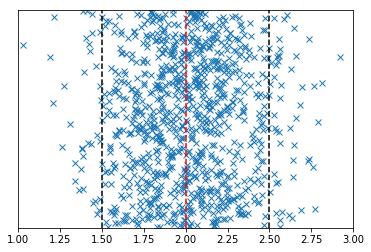

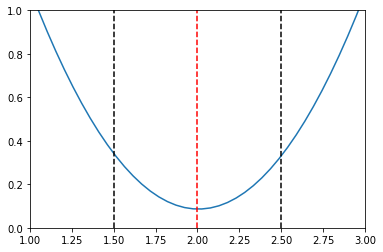

In [28]:
np.random.seed(42)  # To ensure we get the same data every time.
X = np.random.normal(loc=2, scale=0.3, size=(1000,1))
def plot_grid():
    for m in [1.5, 2.5]:
        plt.plot([m,m], [0, 1], 'k--')
    plt.plot([2,2], [0, 1], 'r--')
plt.plot(X, np.random.rand(len(X),1), 'x')
plot_grid()
plt.xlim([1,3])
plt.ylim([0,1])
plt.yticks([])
plt.show()

def mse(X, m):
    return np.sum(np.square((m - X)))/len(X)

m_values = np.linspace(1, 3, 40)
err = [mse(X, m) for m in m_values]
plt.plot(m_values, err)
plot_grid()
plt.xlim([1,3])
plt.ylim([0,1])
plt.show()

The above plots show some one-dimensional normally distributed data around 2.0. We can estimate the location of line that represents the most probable value with the mean. But imagine we couldn't calculate the mean for some reason.

What we can do is slide a range of prospective mean estimates across the data and calculate the mean squared error at each point. The value of the mean squared error for each prospective mean is shown in the second plot.

The red line represents the point at which the error is lowest. Around this point there is a convex slope.

Gradient descent works by calculating the slope of the error at a particular point. It then moves the parameters so that we move down that slope. Eventually we end up at the bottom.

So how do we calculate the gradient? With differential calculus.

## Using Gradient Descent

Below is the matrix form of the partial derivative of the mean squared error.

We can use this equation to update our prospective parameters, known as weights, and iterate towards the bottom of the error surface. (I say surface, not curve, because generally we're working in more than one dimension).

$$
\nabla_{\mathbf{w}} MSE(\mathbf{w}) = \frac{2}{m}\mathbf{x}^T \cdot (\mathbf{x} \cdot \mathbf{w} - \mathbf{y})
$$

Where \\(m\\) is the number of observations.

If we used the equation above to update our weights directly, then we actually end up jumping straight to the bottom. However, we don't generally want to move there in one hop. We want to take it slowly to ensure that we really are still going down the slope.

So instead, we weight the update by a small fraction to slow it down.


So once you have calculated the gradient using the equation above, update the current value of \\(\mathbf{w}\\) by

$$
\mathbf{w} = \mathbf{w} - \eta \nabla_{\mathbf{w}}
$$

In [0]:
np.random.seed(42)  # To ensure we get the same data every time.
X = 2 * np.random.rand(50, 1)
X_b = np.c_[np.ones((50, 1)), X] # add x0 = 1 to each instance (the intercept term, c, in y = mx + c)
y = 8 + 6 * X + np.random.randn(50, 1)

eta = 0.1 # learning rate
n_iterations = 10 # number of iterations
m=len(X) # number of samples

w = np.random.randn(2,1) # random initialization of parameters
w_old = []
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(w) - y)
    w = w - eta * gradients
    w_old.append(w)

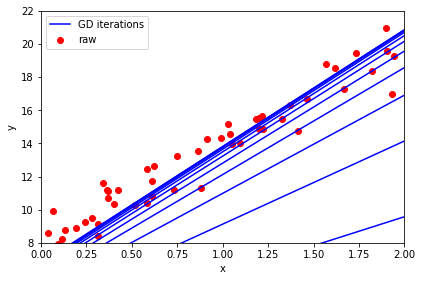

In [30]:
X_new = np.array([[0], [2]])  # Create two x points to be able to draw the line
plt.scatter(X, y,
            color='red', marker='o', label='raw')
for w_i in w_old:
    y_predict = np.array([w_i[0], X_new[1]*w_i[1] + w_i[0]])
    plt.plot(X_new, y_predict, "b-")
plt.plot(X_new, y_predict, "b-", label='GD iterations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.tight_layout()
plt.axis([0, 2, 8, 22])
plt.show()

### Tasks:

- What happens when you alter the learning rate `eta`?
- What happens when you alter the number of iterations `n_iterations`?

And of course, this is already implemented in sklearn under `SGDRegressor`.
Feel free to check that this produces the same result if you wish.

# Notebook Exercise 4: Support Vector Machines and Nonlinear Classifiers

Welcome! This workshop is from [WinderResearch.com](https://WinderResearch.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual).

If you remember from the video training, SVMs are classifiers that attemt to maximise the separation between classes, no matter what the distribution of the data. This means that they can sometimes fit noise more than they fit the data.

But because they are aiming to separate classes, they do a really good job at optimising for accuracy. Let's investigate this below.

In [0]:
# Usual imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn import datasets
from sklearn import preprocessing

In [0]:
# import some data to play with
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
y[y != 0] = 1 # Only use two targets for now
colors = "bry"

# standardize
X = preprocessing.StandardScaler().fit_transform(X)

In [0]:
from sklearn.svm import SVC
# Create a linear SVM
svm_clf = SVC(kernel='linear', C=float("inf")).fit(X, y)

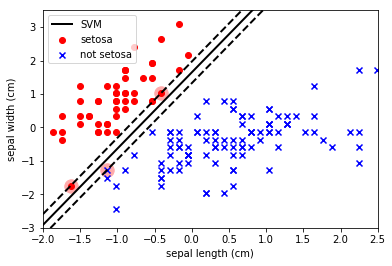

In [34]:
# A fairly complicated function to plot the decision boundary and separation found by a liner SVM.
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2, label="SVM")
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Usual plotting related stuff.
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[y != 0, 0], X[y != 0, 1],
            color='blue', marker='x', label='not setosa')
plt.axis([-2, 2.5, -3, 3.5])
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend(loc='upper left')
plt.show()

Note how the SVM has maximised the separation between the classes and also allowed some datapoints to enter within the boundary. The SVM parameter `C` is a penalty parameter that specifies whether it should force the separation of the classes (`C=inf`) or allow some points to be misclassified to obtain a better fit (`C=small`).

Let's allow some level of misclassification to get a better (IMO) decision boundary:

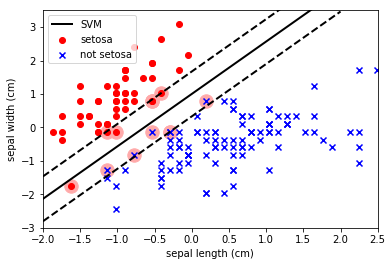

In [35]:
svm_clf = SVC(kernel='linear', C=1.0).fit(X, y)
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[y != 0, 0], X[y != 0, 1],
            color='blue', marker='x', label='not setosa')
plt.axis([-2, 2.5, -3, 3.5])
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend(loc='upper left')
plt.show()

## Kernel Trick

Remember that it is [possible to transform the input data](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) without compromising the integrity of the data. The transformation simply needs to be invertible. The "kernel trick" is a method to transform the data by a complex (invertible) function to allow more complex decision boundaries.

When we preform this trick with SVMs the result is a Kernel SVM. In the next example we choose a _radial basis function_ for our kernel. This is basically a multi-dimensional gaussian. We specify the width of this kernel with the `gamma` parameter. Smaller values of `gamma` will produce more complex boundaries (less smoothing).

In [0]:
from sklearn.svm import SVC
# This is a Support vector machine with a "radial basis function" kernel.
# One issue with SVMs is that they are quite complex to tune, because of all the different parameters.
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=float('inf')).fit(X, y)

In [0]:
from matplotlib.colors import ListedColormap

# A fancy method to plot the decision regions of complex decision boundaries
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, labels=['setosa', 'not setosa'], X_plot=None):

    if X_plot is None:
        X_plot = X
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]                               
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=labels[cl])
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]   
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                alpha=1.0, linewidth=1, marker='o', 
                s=55, label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


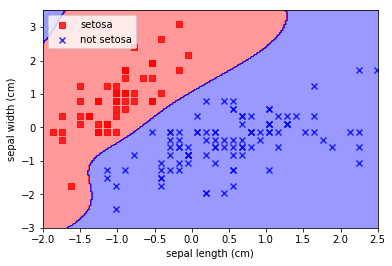

In [38]:
plot_decision_regions(X=X, y=y, classifier=rbf_svc)
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.legend(loc='upper left')

plt.axis([-2, 2.5, -3, 3.5])
plt.show()

Note how insane that decision boundary is. To the extent that the algorithm has "invented" a blue decision region at the top left where there is absolutely no evidence that it should be there. This is the risk of choosing such arbitrary decision boundaries; arbitrary results.

### Bonus Tasks:

- Try testing different classification models. Namely:
  - `SVC(kernel='linear'...`
  - `linear_model.RidgeClassifier`
  - `linear_model.Lasso`

# Notebook Exercise 5: Generalisation and Overfitting

Welcome! This workshop is from [WinderResearch.com](https://WinderResearch.com/?utm_source=trainingdatascience&utm_medium=notebook&utm_campaign=workshop&utm_term=individual).

Imagine you had developed a model that predicts some output. The goal of any model is to generate a correct prediction and avoid incorrect predictions. But how can we be sure that predictions are as good as they can possibly be?

Now constrain your imagining to a classification task (other tasks have similar properties but I find classification easiest to reason about). We use some data to train the model. The result of the training process will be a decision boundary. I.e. class A on one side, class B on another.

Data is noisy. If we're not careful, we will end up fitting the noise, not the underlying process. In other words our model would be trained to classify based upon the presence of the noise, rather than the underlying signal. This is bad and is called overfitting. Often you will see good training results and poor real-life/production results.

The opposite problem is the signal, the representation of the underlying process, is quite complicated. For example, maybe your data isn't seperable with a linear model. If you tried to use a simple model such as this you might see similar levels of poor performance in both training and real-life production. This is called underfitting.

In reality, underfitting is probably better than overfitting, because at least your model is performing to some expected standard. The worst case scenario is when you tell your boss you have an amazing new model that will change the world, only for it to crash and burn in production!

This workshop is an introduction to under and overfitting.

In [0]:
# Usual imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

## Plotting Under and Overfitting

First we're going to generate some complex two-dimensional data. This allows us to be able to plot the data easily whilst making the data complex enough to show the effects of under and overfitting. These data are two concentric circles; i.e. one circle within another.

In [0]:
from sklearn.datasets import make_circles

# Synthetic data
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

First I want to show you the decision boundaries generated by under and overfitting models. This should give you some visual intuition as to what I mean by a "complex decision boundary".

To do this I'm going to use an SVM with a radial basis function. Check out the [workshop on SVMs](http://members.trainingdatascience.com/workshops/classification/) if you haven't come across this before. The good think about the RBF version of a SVM is that we can use the size of the RBF to simulate simple and complex decision boundaries.

In [0]:
from sklearn.svm import SVC

classifiers = [        # Three different SVM classifiers with difference values of gamma.
    SVC(gamma=0.001),
    SVC(gamma=1),
    SVC(gamma=20)]
names = ["SVM (rbf, $\gamma = 0.001$)", "SVM (rbf, $\gamma = 1$)", "SVM (rbf, $\gamma = 20$)"]

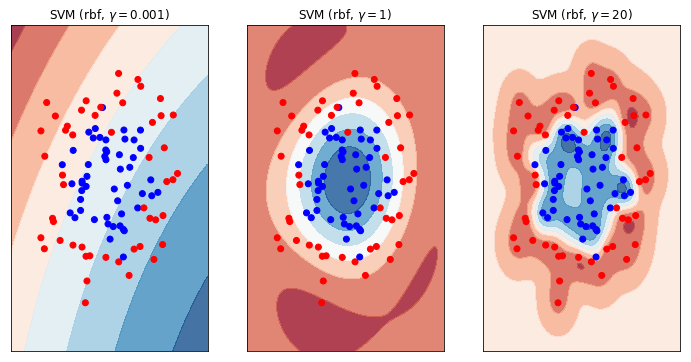

In [42]:
from matplotlib.colors import ListedColormap

figure = plt.figure(figsize=(12, 6))
i = 1
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1
plt.show()

Let me explain the plot above. The data comrpises of two classes, blue and red. There are contour plots shown on top of the scatter plots which show the decision boundary for our trained SVM model. Where the contour is red we will predict red. Where the contour is blue, predict blue. White means there is a 50/50 chance of either class (i.e. this is the definitive decision boundary).

Now study these three plots in detail. This is very important. What do you see? Whare are the differences? What are the similarities? What effect does each model have on the ultimate prediction?

What you can see is the effect of making the decision boundary more or less "complex". On the left, we have a very simple model; one that approaches a linear classifier. We can see that this model is not complex enough to model the underlying data. We can't expect this model to do well in either the training or production phases. This model is _underfitting_.

On the right hand side we have the opposite. The decision boundary almost wraps around each individual observation. In effect we have created a lookup table! What's more, look at the middle of the right hand plot. There's a bit of a gap in the centre of the data and there we're predicting a 50/50 (ish - depends on the randomly generated data) chance of either class, even though we would never expect a red observation in the middle of the blues! This is a complex decision boundary. It is bad because we are fitting around the noise of the problem. We should expect training performance to be good, but production performance to be bad. This model is _overfitting_.

## Using Holdout Data to Avoid Overfitting

We don't want to embaress ourselves, so how do we avoid overfitting? 

One of the simplest way of achieving this is to split the data into separate training and testing datasets. We use the training data to train the model and the test dataset to generate a final score of our model after training. 

In effect we are creating some "pretend" production data. We're imagining that we've never seen this data before, just like in a production environment, and we're asking what would that performance look like?

This is called a train-test split.

First, let's see what our accuracy score would be if weren't using a train-test split...

In [43]:
overfit = SVC(kernel='rbf', gamma=0.7, C=float('inf')).fit(X,y)
o_score = overfit.score(X, y)
print("Before holdout, the score is %.2f" % o_score)

Before holdout, the score is 1.00


Nice! Perfect result. But wait, are we overfitting? Let's create a train test split, train upon the training data and then score upon the test data. This is an estimate of what the score would be in a production environment (where we have never seen the new data before).

In [0]:
from sklearn.model_selection import train_test_split

# This is how we split our data, using the `train_test_split` method
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

In [45]:
overfit = SVC(gamma=20).fit(X_train,y_train)  # Training data
score = overfit.score(X_train, y_train)       # First view the training score, this is still important to measure.
print("The training score is %.2f" % score)
score = overfit.score(X_test, y_test)         # Test data, the model has never seen this data
print("With holdout, the score is %.2f" % score)

The training score is 0.98
With holdout, the score is 0.85


That's quite a difference!

We can tell that we are overfitting because the difference between the training score and the test score is quite large. We would probably want to try reducing the complexity of our model to bring those scores closer together.

## Visualising underfitting and overfitting

To visualise performance when altering parameters in a model that control fitting,
we can plot a validation curve.

Basically this is just a brute force approach to calculate the score on some holdout data
for each parameter value that you specify.

But the coolest thing about sklearns implementation is that it performs _cross-validation_.

This is where we repeat the fitting multiple times using different parts of the dataset
as training and test data.

That way, we get some statistical confidence about our scores.

In [0]:
# Use sklearns inbuilt validation_curve method
# Although it wouldn't be too hard to code ourselves.
from sklearn.model_selection import validation_curve


param_range = np.logspace(-2, 3, 10)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)

# Generate average scores and standard deviations for more interesting plots
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

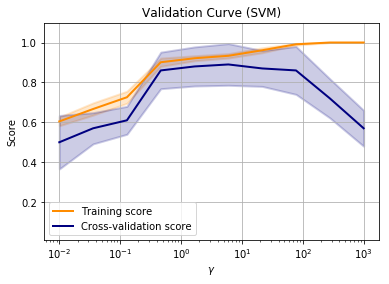

In [47]:
# Plot the results
plt.figure()
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.title("Validation Curve (SVM)")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.01, 1.1)
plt.grid()
plt.legend(loc="best")
plt.show()

Now it is clear that the best value for gamma is somewhere around a value of `1-10`.

The beauty is that this works on data of any number of dimensions.

But it does get tricky when you have multiple parameters to tune. For this we have
to perform a _grid search_.

## Learning curves

Another way of visualising performance is with a learning curve.

This plot uses different size samples to perform the training.

If there is a large gap between the train and validation score, then we are overfitting.

If the training score is low, we are underfitting.

If we can see the learning curve continue to rise with more samples, then we might get better
performance if we collected more samples.

### Use

We use the learning curve in a similar way to the validation curve above, but using the module:
`from sklearn.model_selection import learning_curve`.

### Tasks

- Plot the learning curve. You should be able to use similar code as above

In [0]:
# Your code here

In [0]:
from sklearn.datasets import make_moons

# Synthetic data
X, y = make_moons(noise=0.2, random_state=42)

# This is how we split our data, using the `train_test_split` method
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

### Bonus tasks

- Fit a Support Vector Machine to the above "moons" data.